In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

In [2]:
from keras.applications import inception_v3
model = inception_v3.InceptionV3(weights='imagenet')
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

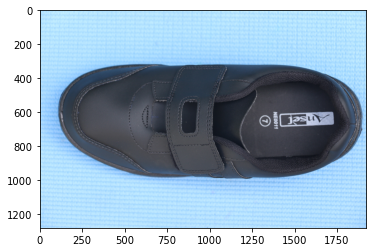

In [3]:
from PIL import Image
image = Image.open('./shoes/test/1K8A8941.JPG')
plt.imshow(image)

In [4]:
from keras import preprocessing

img = preprocessing.image.load_img('./shoes/test/1K8A8941.JPG', target_size=(299,299))
x = preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = inception_v3.preprocess_input(x)
predictions = model.predict(x)
labels = inception_v3.decode_predictions(predictions, top=3)[0]

labels

[('n03623198', 'knee_pad', 0.83516014),
 ('n04133789', 'sandal', 0.029606244),
 ('n02841315', 'binoculars', 0.025924588)]

In [5]:
import time

#get references to the webcam,
camera = cv2.VideoCapture(0)
camera_height = 500

while(True):
    
    #read new frame
    _, frame = camera.read()
    
    #flip frame
    frame = cv2.flip(frame, 1)
    
    #rescaling cam outout
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height)
    frame = cv2.resize(frame,(res,camera_height))
                    
    #add rectangle
    cv2.rectangle(frame,(300,75),(650,425),(240,100,0),2)
    
                    
    #get ROI
    roi = frame[75+2:425-2, 300+2:650-2]
    
    #parse BRG to RGB
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
                    
    #reseze to 224*224
    roi = cv2.resize(roi,(299,299))
    roi = inception_v3.preprocess_input(roi)
    
    #predict
    roi2 = np.array([cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)])
                    
    predictions = model.predict(roi2)
                    
    labels = inception_v3.decode_predictions(predictions, top=3)[0]
                    
                    
    #add text
    label_1 = '{}- {}%'.format(labels[0][1], int(labels[0][2]*100))
    cv2.putText(frame, label_1, (70,170),
               cv2.FONT_HERSHEY_SIMPLEX, 0.9, (20,240,150),2)
                    
                     
    #add text
    label_2 = '{}- {}%'.format(labels[0][1], int(labels[0][2]*100))
    cv2.putText(frame, label_2, (70,170),
               cv2.FONT_HERSHEY_SIMPLEX, 0.9, (20,240,150),2)
                    
                     
    #add text
    label_3 = '{}- {}%'.format(labels[0][1], int(labels[0][2]*100))
    cv2.putText(frame, label_3, (70,170),
               cv2.FONT_HERSHEY_SIMPLEX, 0.9, (20,240,150),2)
                    
    #show the frame
    cv2.imshow("Real Time object detection", frame)
    key = cv2.waitKey(1)
                    
    #quit cam pressing by 'q'
    if key & 0xFF == ord('q'):
        break
                    
camera.release()
cv2.destroyAllWindows()